In [1]:
# -*- coding: utf-8 -*-
import cv2
import sys
from constants import *
from emotion_recognition import EmotionRecognition
from os.path import join
import os
import numpy as np
import matplotlib.pyplot as plt

import pandas
from pandas import DataFrame
from skimage.transform import resize

In [39]:
%matplotlib inline
from IPython.core.display import HTML
HTML("""<style> .rendered_html code { 
    padding: 2px 4px;
    color: #c7254e;
    background-color: #f9f2f4;
    border-radius: 4px;
} </style>""")

In [5]:
#Load file in folder
dirname = 'RafD'

#Load every image file in the provided directory
filenames = [os.path.join(dirname, fname)
             for fname in os.listdir(dirname)]

In [53]:
#Find Happy face only

import glob
happy = glob.glob('RafD/*happy*')

#Make sure we have exactly 10 image files for test (you can include more)
happy = happy[:16]
assert(len(happy) == 16)

In [54]:
# Read every filename as an RGB image
imgs = [plt.imread(fname)[..., :3] for fname in happy]

In [55]:
def imcrop_tosquare(img):
    """Make any image a square image.
    Parameters
    ----------
    img : np.ndarray
        Input image to crop, assumed at least 2d.
    Returns
    -------
    crop : np.ndarray
        Cropped image.
    """
    size = np.min(img.shape[:2])
    extra = img.shape[:2] - size
    crop = img
    for i in np.flatnonzero(extra):
        crop = np.take(crop, extra[i] // 2 + np.r_[:size], axis=i)
    return crop

def montage(images, saveto='montage.png'):
    """Draw all images as a montage separated by 1 pixel borders.
    Also saves the file to the destination specified by `saveto`.
    Parameters
    ----------
    images : numpy.ndarray
        Input array to create montage of.  Array should be:
        batch x height x width x channels.
    saveto : str
        Location to save the resulting montage image.
    Returns
    -------
    m : numpy.ndarray
        Montage image.
    """
    if isinstance(images, list):
        images = np.array(images)
    img_h = images.shape[1]
    img_w = images.shape[2]
    n_plots = int(np.ceil(np.sqrt(images.shape[0])))
    if len(images.shape) == 4 and images.shape[3] == 3:
        m = np.ones(
            (images.shape[1] * n_plots + n_plots + 1,
             images.shape[2] * n_plots + n_plots + 1, 3)) * 0.5
    else:
        m = np.ones(
            (images.shape[1] * n_plots + n_plots + 1,
             images.shape[2] * n_plots + n_plots + 1)) * 0.5
    for i in range(n_plots):
        for j in range(n_plots):
            this_filter = i * n_plots + j
            if this_filter < images.shape[0]:
                this_img = images[this_filter]
                m[1 + i + i * img_h:1 + i + (i + 1) * img_h,
                  1 + j + j * img_w:1 + j + (j + 1) * img_w] = this_img
    plt.imsave(arr=m, fname=saveto)
    return m

In [56]:
# Crop every image to a square
imgs = [imcrop_tosquare(img_i) for img_i in imgs]

# Then resize the square image to 48 x 48 pixels
imgs = [resize(img_i, (48, 48)) for img_i in imgs]

# Make list of 3d imgaes a 4d array with the first dimension the number of images:
imgs = np.array(imgs).astype(np.float32)

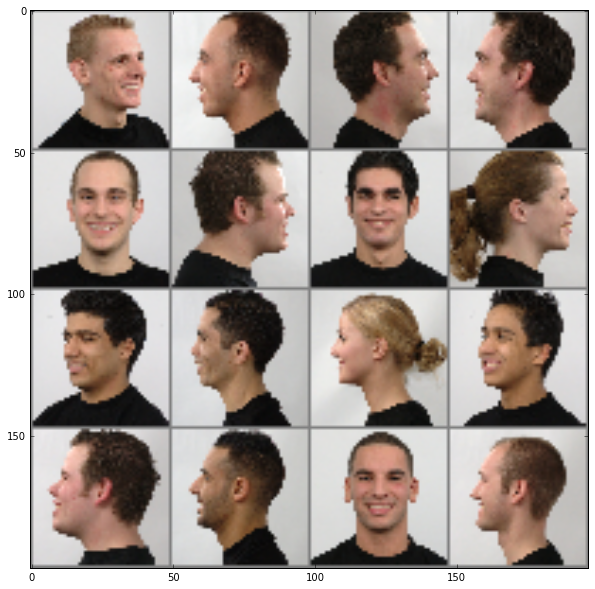

In [57]:
# Plot the resulting dataset:
# Make sure you "run" this cell after you create your `imgs` variable as a 4-D array!

plt.figure(figsize=(10, 10))
plt.imshow(montage(imgs, saveto='dataset.png'))

In [59]:
s = pandas.DataFrame(imgs)

ValueError: Must pass 2-d input

In [4]:
network = EmotionRecognition()
network.build_network()

images = np.load('./data_kike.npy')
labels = np.load('./labels_kike.npy')

#images = images.reshape([-1, SIZE_FACE, SIZE_FACE, 1])
#labels = labels.reshape([-1, len(EMOTIONS)])

[+] Building CNN


InternalError: Dst tensor is not initialized.
	 [[Node: Momentum_2/zeros_7 = Const[dtype=DT_FLOAT, value=Tensor<type: float shape: [18432,3072] values: 0 0 0...>, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
Caused by op u'Momentum_2/zeros_7', defined at:
  File "/home/ryan/anaconda2/lib/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/ryan/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/ryan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/ryan/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 596, in launch_instance
    app.start()
  File "/home/ryan/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 442, in start
    ioloop.IOLoop.instance().start()
  File "/home/ryan/anaconda2/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/home/ryan/anaconda2/lib/python2.7/site-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/home/ryan/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ryan/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/ryan/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/ryan/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/ryan/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ryan/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/ryan/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/ryan/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 391, in execute_request
    user_expressions, allow_stdin)
  File "/home/ryan/anaconda2/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/ryan/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/ryan/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2825, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/ryan/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-21cd40d76733>", line 2, in <module>
    network.build_network()
  File "emotion_recognition.py", line 42, in build_network
    tensorboard_verbose = 2
  File "/home/ryan/anaconda2/lib/python2.7/site-packages/tflearn/models/dnn.py", line 57, in __init__
    session=session)
  File "/home/ryan/anaconda2/lib/python2.7/site-packages/tflearn/helpers/trainer.py", line 111, in __init__
    clip_gradients)
  File "/home/ryan/anaconda2/lib/python2.7/site-packages/tflearn/helpers/trainer.py", line 574, in initialize_training_ops
    name="apply_grad_op_" + str(i))
  File "/home/ryan/anaconda2/lib/python2.7/site-packages/tensorflow/python/training/optimizer.py", line 300, in apply_gradients
    self._create_slots(var_list)
  File "/home/ryan/anaconda2/lib/python2.7/site-packages/tensorflow/python/training/momentum.py", line 51, in _create_slots
    self._zeros_slot(v, "momentum", self._name)
  File "/home/ryan/anaconda2/lib/python2.7/site-packages/tensorflow/python/training/optimizer.py", line 494, in _zeros_slot
    named_slots[var] = slot_creator.create_zeros_slot(var, op_name)
  File "/home/ryan/anaconda2/lib/python2.7/site-packages/tensorflow/python/training/slot_creator.py", line 106, in create_zeros_slot
    val = array_ops.zeros(primary.get_shape().as_list(), dtype=dtype)
  File "/home/ryan/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/array_ops.py", line 1131, in zeros
    output = constant(0, shape=shape, dtype=dtype, name=name)
  File "/home/ryan/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/constant_op.py", line 167, in constant
    attrs={"value": tensor_value, "dtype": dtype_value}, name=name).outputs[0]
  File "/home/ryan/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2310, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/ryan/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1232, in __init__
    self._traceback = _extract_stack()


In [19]:
images.shape[0]

13975

In [25]:
data = np.zeros((len(EMOTIONS),len(EMOTIONS)))
for i in xrange(images.shape[0]):
    result = network.predict(images[i])
    data[np.argmax(labels[i]), result[0].index(max(result[0]))] += 1

In [31]:
for i in range(len(data)):
    total = np.sum(data[i])
    for x in range(len(data[0])):
        data[i][x] = data[i][x] / total

print(data)

[[ 0.          0.          0.          0.06584821  0.          0.93415179
   0.        ]
 [ 0.          0.          0.          0.04290429  0.          0.95709571
   0.        ]
 [ 0.          0.          0.          0.04761905  0.          0.95238095
   0.        ]
 [ 0.          0.          0.          0.03048327  0.          0.96951673
   0.        ]
 [ 0.          0.          0.          0.07432854  0.          0.92567146
   0.        ]
 [ 0.          0.          0.          0.03128689  0.          0.96871311
   0.        ]
 [ 0.          0.          0.          0.0678392   0.          0.9321608
   0.        ]]


In [34]:
print '[+] Generating graph'
c = plt.pcolor(data, edgecolors = 'k', linewidths = 4, cmap = 'Blues', vmin = 0.0, vmax = 1.0)
def show_values(pc, fmt="%.2f", **kw):
    from itertools import izip
    pc.update_scalarmappable()
    ax = pc.get_axes()
    ax.set_yticks(np.arange(len(EMOTIONS)) + 0.5, minor = False)
    ax.set_xticks(np.arange(len(EMOTIONS)) + 0.5, minor = False)
    ax.set_xticklabels(EMOTIONS, minor = False)
    ax.set_yticklabels(EMOTIONS, minor = False)
    for p, color, value in izip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha = "center", va = "center", color = color, **kw)

[+] Generating graph


In [35]:
show_values(c)
plt.xlabel('Predicted Emotion')
plt.ylabel('Real Emotion')
plt.show()

/home/ryan/anaconda2/lib/python2.7/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)
